# Lab05_108032053

## 1. Training using various models

In [1]:
%matplotlib inline
from pylab import *
from sklearn.model_selection import train_test_split

import os
if not os.path.exists("output/"):
  os.mkdir("output/")
if not os.path.exists("data/"):
  os.mkdir("data/")

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Download the dataset
import pandas as pd
import numpy as np
import urllib.request

urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_train.csv", "./data/X_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/y_train.csv", "./data/y_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_test.csv", "./data/X_test.csv")

X_train_df = pd.read_csv('./data/X_train.csv')
Y_train_df = pd.read_csv('./data/y_train.csv')
X_test_df = pd.read_csv('./data/X_test.csv')

X_train_df.head()

,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST
0,1,358,2.4,0,3.2,20.6,2,4.5
1,1,585,8.3,0,1.2,3.0,2,0.5
2,1,540,19.9,0,0.6,3.5,2,3.2
3,1,392,9.0,0,0.9,21.1,2,4.9
4,3,401,22.7,0,0.7,4.1,2,2.9


In [3]:
# Preprocess the dataset
from sklearn.preprocessing import StandardScaler

X = X_train_df.values
Y = Y_train_df['FGM'].values
X_t = X_test_df.values

sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)
X_t_std = sc_x.fit_transform(X_t)

### 1.1 RidgeClassifier

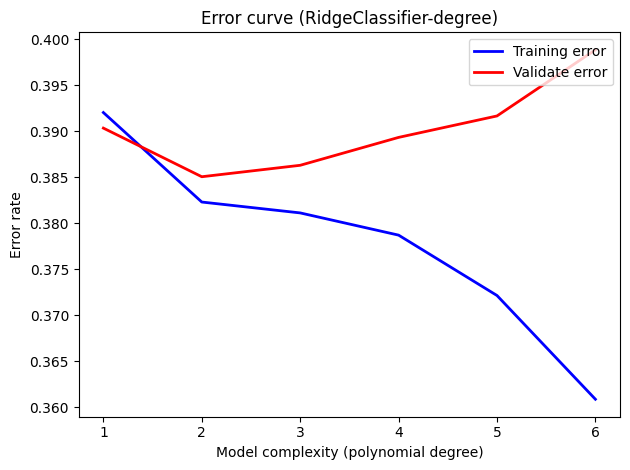


Minimum validate error rate: 0.38506 --> Degree: 2



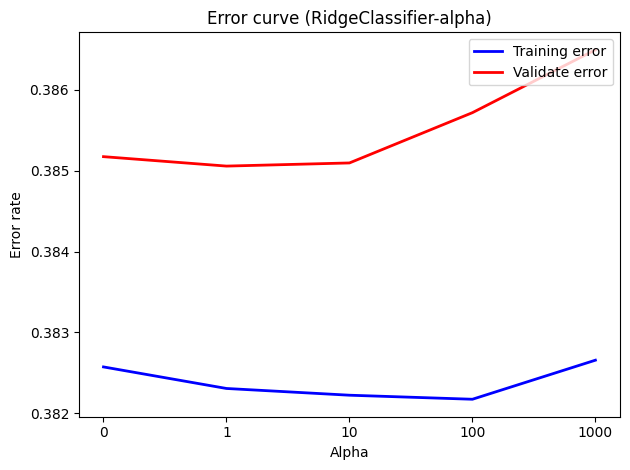


Minimum validate error rate: 0.38506 --> Alpha: 1

--> Best Configuration: degree=2, alpha=1 --> Accuracy rate: 0.61494


In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

# Tune degree
degree = [1, 2, 3, 4, 5, 6]
n = len(degree)
error_rate_train = []
error_rate_validate = []

for d in degree:
  poly = PolynomialFeatures(degree=d)
  X_poly = poly.fit_transform(X_std)
  X_train, X_validate, Y_train, Y_validate = train_test_split(
    X_poly, Y, test_size=0.3, random_state=0)

  rc = RidgeClassifier(alpha=1)
  rc.fit(X_train, Y_train)

  Y_train_pred = rc.predict(X_train)
  Y_validate_pred = rc.predict(X_validate)

  error_rate_train.append(1 - accuracy_score(Y_train, Y_train_pred))
  error_rate_validate.append(1 - accuracy_score(Y_validate, Y_validate_pred))

plt.plot(range(n), error_rate_train, label='Training error', color='blue', linewidth=2)
plt.plot(range(n), error_rate_validate, label='Validate error', color='red', linewidth=2)
plt.legend(loc='upper right')
plt.xticks(range(n), degree)
plt.xlabel('Model complexity (polynomial degree)')
plt.ylabel('Error rate')
plt.title('Error curve (RidgeClassifier-degree)')
plt.tight_layout()
plt.savefig('./output/error_curve_RidgeClassifier_degree.png', dpi=300)
plt.show()

min_error_rate = min(error_rate_validate)
deg = degree[error_rate_validate.index(min_error_rate)]
print(f'\nMinimum validate error rate: {min_error_rate:.5f} --> Degree: {deg}\n')

# Tune alpha
alp = [0, 1, 10, 100, 1000]
n = len(alp)
error_rate_train = []
error_rate_validate = []

poly = PolynomialFeatures(degree=deg)
X_poly = poly.fit_transform(X_std)
X_train, X_validate, Y_train, Y_validate = train_test_split(
    X_poly, Y, test_size=0.3, random_state=0)

for a in alp:
  rc = RidgeClassifier(alpha=a)
  rc.fit(X_train, Y_train)

  Y_train_pred = rc.predict(X_train)
  Y_validate_pred = rc.predict(X_validate)

  error_rate_train.append(1 - accuracy_score(Y_train, Y_train_pred))
  error_rate_validate.append(1 - accuracy_score(Y_validate, Y_validate_pred))

plt.plot(range(n), error_rate_train, label='Training error', color='blue', linewidth=2)
plt.plot(range(n), error_rate_validate, label='Validate error', color='red', linewidth=2)
plt.legend(loc='upper right')
plt.xticks(range(n), alp)
plt.xlabel('Alpha')
plt.ylabel('Error rate')
plt.title('Error curve (RidgeClassifier-alpha)')
plt.tight_layout()
plt.savefig('./output/error_curve_RidgeClassifier_alpha.png', dpi=300)
plt.show()

min_error_rate = min(error_rate_validate)
alpha = alp[error_rate_validate.index(min_error_rate)]
print(f'\nMinimum validate error rate: {min_error_rate:.5f} --> Alpha: {alpha}\n')

print(f'--> Best Configuration: degree={deg}, alpha={alpha} --> Accuracy rate: {1 - min_error_rate:.5f}')

### 1.2 SGDClassifier

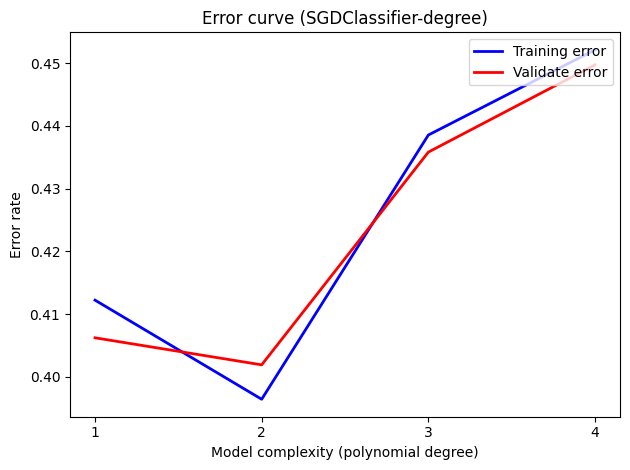


Minimum validate error rate: 0.40189 --> Degree: 2



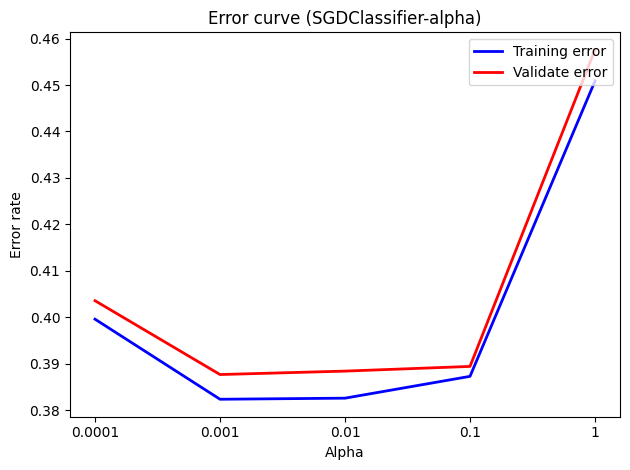


Minimum test error rate: 0.38766 --> Alpha: 0.001

--> Best Configuration: degree=2, alpha=0.001 --> Accuracy rate: 0.61234


In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Tune degree
degree = [1, 2, 3, 4]
n = len(degree)
error_rate_train = []
error_rate_validate = []

for d in degree:
  poly = PolynomialFeatures(degree=d)
  X_poly = poly.fit_transform(X_std)
  X_train, X_validate, Y_train, Y_validate = train_test_split(
    X_poly, Y, test_size=0.3, random_state=0)

  sc = SGDClassifier()
  sc.fit(X_train, Y_train)

  Y_train_pred = sc.predict(X_train)
  Y_validate_pred = sc.predict(X_validate)

  error_rate_train.append(1 - accuracy_score(Y_train, Y_train_pred))
  error_rate_validate.append(1 - accuracy_score(Y_validate, Y_validate_pred))

plt.plot(range(n), error_rate_train, label='Training error', color='blue', linewidth=2)
plt.plot(range(n), error_rate_validate, label='Validate error', color='red', linewidth=2)
plt.legend(loc='upper right')
plt.xticks(range(n), degree)
plt.xlabel('Model complexity (polynomial degree)')
plt.ylabel('Error rate')
plt.title('Error curve (SGDClassifier-degree)')
plt.tight_layout()
plt.savefig('./output/error_curve_SGDClassifier_degree.png', dpi=300)
plt.show()

min_error_rate = min(error_rate_validate)
deg = degree[error_rate_validate.index(min_error_rate)]
print(f'\nMinimum validate error rate: {min_error_rate:.5f} --> Degree: {deg}\n')

# Tune alpha
alp = [0.0001, 0.001, 0.01, 0.1, 1]
n = len(alp)
error_rate_train = []
error_rate_validate = []

poly = PolynomialFeatures(degree=deg)
X_poly = poly.fit_transform(X_std)
X_train, X_validate, Y_train, Y_validate = train_test_split(
    X_poly, Y, test_size=0.3, random_state=0)

for a in alp:
  sc = SGDClassifier(alpha=a)
  sc.fit(X_train, Y_train)

  Y_train_pred = sc.predict(X_train)
  Y_validate_pred = sc.predict(X_validate)

  error_rate_train.append(1 - accuracy_score(Y_train, Y_train_pred))
  error_rate_validate.append(1 - accuracy_score(Y_validate, Y_validate_pred))

plt.plot(range(n), error_rate_train, label='Training error', color='blue', linewidth=2)
plt.plot(range(n), error_rate_validate, label='Validate error', color='red', linewidth=2)
plt.legend(loc='upper right')
plt.xticks(range(n), alp)
plt.xlabel('Alpha')
plt.ylabel('Error rate')
plt.title('Error curve (SGDClassifier-alpha)')
plt.tight_layout()
plt.savefig('./output/error_curve_SGDClassifier_alpha.png', dpi=300)
plt.show()

min_error_rate = min(error_rate_validate)
alpha = alp[error_rate_validate.index(min_error_rate)]
print(f'\nMinimum test error rate: {min_error_rate:.5f} --> Alpha: {alpha}\n')

print(f'--> Best Configuration: degree={deg}, alpha={alpha} --> Accuracy rate: {1 - min_error_rate:.5f}')

## 2. Select 3 features

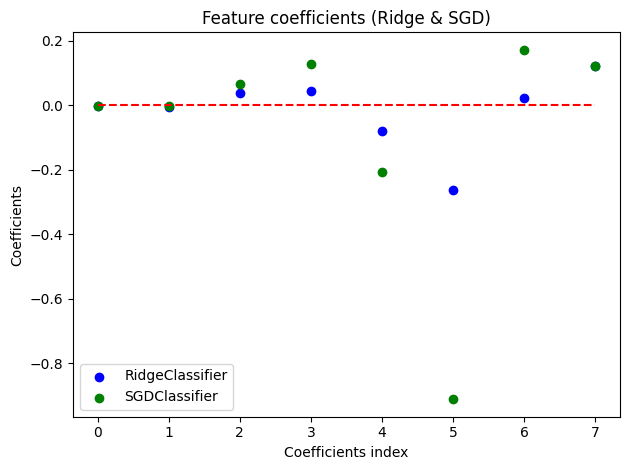


--> Selected attributes (RidgeClassifier): ['SHOT_DIST' 'CLOSE_DEF_DIST' 'TOUCH_TIME']

--> Selected attributes (SGDClassifier): ['SHOT_DIST' 'TOUCH_TIME' 'PTS_TYPE']


In [6]:
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier

var_num = X_std.shape[1]

rc = RidgeClassifier(alpha=1)
sc = SGDClassifier(alpha=0.01)
rc.fit(X_std, Y)
sc.fit(X_std, Y)

plt.scatter(range(var_num), rc.coef_[0], label='RidgeClassifier', color='blue')
plt.scatter(range(var_num), sc.coef_[0], label='SGDClassifier', color='green')
plt.hlines(y=0, xmin=0, xmax=var_num - 1, color='red', linestyle='--')
plt.legend(loc = 'lower left')
plt.xlabel('Coefficients index')
plt.ylabel('Coefficients')
plt.title('Feature coefficients (Ridge & SGD)')
plt.tight_layout()
plt.savefig('./output/feature_coefficients_Ridge_SGD.png', dpi=300)
plt.show()

idxs_Ridge = [i for i, v in sorted(enumerate(rc.coef_[0]), key=lambda x: -abs(x[1]))][:3]
idxs_SGD = [i for i, v in sorted(enumerate(sc.coef_[0]), key=lambda x: -abs(x[1]))][:3]
print(f'\n--> Selected attributes (RidgeClassifier): {X_train_df.columns.values[idxs_Ridge]}')
print(f'\n--> Selected attributes (SGDClassifier): {X_train_df.columns.values[idxs_SGD]}')

## 3. Training using 3 features

### 3.1 RidgeClassifier

In [7]:
X = X_train_df.iloc[:, idxs_Ridge].values
y = Y_train_df['FGM'].values

sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_std)
X_train, X_validate, Y_train, Y_validate = train_test_split(
  X_poly, Y, test_size=0.3, random_state=0)

rc = RidgeClassifier(alpha=1)
rc.fit(X_train, Y_train)

Y_train_pred = rc.predict(X_train)
Y_validate_pred = rc.predict(X_validate)

print(f'\n--> Trainning error rate: {1 - accuracy_score(Y_train, Y_train_pred):.5f}')
print(f'\n--> Accuracy rate: {accuracy_score(Y_validate, Y_validate_pred):.5f}')


--> Trainning error rate: 0.38577

--> Accuracy rate: 0.61280


### 3.2 SGDClassifier

In [8]:
X = X_train_df.iloc[:, idxs_SGD].values
y = Y_train_df['FGM'].values

sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_std)
X_train, X_validate, Y_train, Y_validate = train_test_split(
  X_poly, y, test_size=0.3, random_state=0)

sc = SGDClassifier(alpha=0.01)
sc.fit(X_train, Y_train)

Y_train_pred = sc.predict(X_train)
Y_validate_pred = sc.predict(X_validate)

print(f'\n--> Trainning error rate: {1 - accuracy_score(Y_train, Y_train_pred):.5f}')
print(f'\n--> Accuracy rate: {accuracy_score(Y_validate, Y_validate_pred):.5f}')


--> Trainning error rate: 0.39014

--> Accuracy rate: 0.60495


## 4. Final model and predict X_test (RidgeClassifier, degree=2, alpha=1)

In [9]:
X = X_train_df.iloc[:, idxs_Ridge].values
X_test = X_test_df.iloc[:, idxs_Ridge].values
Y = Y_train_df['FGM'].values

sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)
X_test_std = sc_x.fit_transform(X_test)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_std)
X_test = poly.fit_transform(X_test_std)
X_train, Y_train = X_poly, Y

rc = RidgeClassifier(alpha=1)
rc.fit(X_train, Y_train)

Y_train_pred = rc.predict(X_train)
Y_test_pred = rc.predict(X_test)

print(f'\n--> Trainning error rate: {1 - accuracy_score(Y_train, Y_train_pred):.5f}\n')

df = pd.DataFrame(Y_test_pred, columns=['FGM'])
df.to_csv('./output/Lab05_108032053_y_pred.csv', index=False)


--> Trainning error rate: 0.38643



## 5. Report

- Training with different models
    - 我選擇了sklearn.linear_model裡的RidgeClassifier和SGDClassifier來做測試，並分別在兩種model中，調整degree和alpha來找出最適當的參數。
    - 訓練的方法為首先使用StandardScaler將training data做preprocessing，並使用PolynomialFeatures後，切成70%作為training data、30%作為validation data，得到兩種model在不同的degree和alpha下的training error和validate error(如下圖)，取validate error最小時的參數，由下圖可知這樣的挑選方式不會發生overfitting，但如果模型的複雜度再更大的話就會發生overfitting。
    - Best Configuration (Ridge Classifier): degree=2, alpha=1 --> Accuracy rate: 0.61494
    - Best Configuration (SGDClassifier): degree=2, alpha=0.001 --> Accuracy rate: 0.61323
    ![](https://i.imgur.com/PSFxhF7.png)
    ![](https://i.imgur.com/Fo1BNkL.png)
    ![](https://i.imgur.com/1wWcLkq.png)
    ![](https://i.imgur.com/33NZXSx.png)

- Select three features
    - 在這裡我使用了只經過StandardScaler的data來做訓練，並將RidgeClassifier和SGDClassifier的coefficient畫出來(如下圖)，從中選擇係數絕對值最大的3個作為feature，代表他們可能與結果有更大的關係。
    - Selected attributes (RidgeClassifier): ['SHOT_DIST' 'CLOSE_DEF_DIST' 'TOUCH_TIME']
    - Selected attributes (SGDClassifier): ['SHOT_DIST' 'TOUCH_TIME' 'PTS_TYPE']
    ![](https://i.imgur.com/UEHtRbO.png)

- Training with three features
    - 重新以剛剛得到的3個feature來訓練2個模型，由以下數據發現RidgeClassifier的結果較好一點，所以選擇這組模型。
    - RidgeClassifier --> Accuracy rate: 0.61280
    - SGDClassifier --> Accuracy rate: 0.60433

- Final model and predict X_test (RidgeClassifier, degree=2, alpha=1)
    - 最後以剛剛得出的模型加上所有的test data(不再分出validate data)來做訓練，並以訓練出來的模型predict X_test的結果，輸出至csv檔中。